<a href="https://colab.research.google.com/github/estatwesley/proba/blob/main/Firework_Process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proposta 7
## Versões adicionais do Firework Process

O programa deve ser capaz de obter o número médio de partículas ao fim do
processo Firework para os casos:

- As partículas estão distribuídas de forma aleatória sobre os inteiros positivos;
- Em cada sítio dos inteiros positivos há um número aleatório de partículas.

### Modelo 1
*Neste modelo geramos uma lista de particulas a partir de uma distribuição geométrica e percorremos esta lista buscando avaliar a sobrevivência do processo.*

In [63]:
import numpy as np

def generate_particles(n, p):
    """
    Gera uma lista de partículas utilizando uma distribuição geométrica.

    Args:
    n (int): Número de partículas a serem geradas.
    p (float): Parâmetro da distribuição geométrica (probabilidade de sucesso).

    Returns:
    list: Lista de partículas geradas.
    """
    return np.random.geometric(p, n) - 1

def firework_process(particle_list):
    """
    Simula o processo de fogos de artifício com uma lista de partículas geradas.

    Args:
    particle_list (list): Lista de partículas onde o valor de cada partícula
                          determina o raio de ação dessa partícula.

    Returns:
    int: Número de partículas percorridas até o fim do experimento.
    """
    index = 0
    total_particles_visited = 0

    while index < len(particle_list):
        current_particle = particle_list[index]

        # Conta a partícula atual como visitada
        total_particles_visited += 1

        # Verifica se a partícula tem tamanho zero
        if current_particle == 0:
            break

        # Salta para a próxima partícula
        index += 1

    return total_particles_visited

# Parâmetros do experimento
p = 0.5  # Parâmetro da distribuição geométrica
n = 100  # Número de partículas a serem geradas

# Gera as partículas antes do experimento
particle_list = generate_particles(n, p)
print(f"Lista de partículas geradas: {particle_list}")

# Executa a simulação
total_particles_affected = firework_process(particle_list)
print(f"Total de partículas percorridas até o fim do experimento: {total_particles_affected}")


Lista de partículas geradas: [3 0 1 0 0 0 2 0 0 2 4 1 1 0 1 3 2 0 0 0 2 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 2
 0 0 2 0 1 1 3 7 3 1 3 1 0 1 1 4 0 0 2 6 0 2 0 0 0 0 0 0 0 0 3 0 4 0 5 0 0
 0 1 0 0 0 0 0 1 1 0 1 0 3 0 0 0 0 1 2 2 0 0 0 1 0 1]
Total de partículas percorridas até o fim do experimento: 2


*No Modelo 1 o código simplesmente avança para a próxima partícula até encontrar uma partícula de raio zero, esta abordage não é adequada, dado que é possível a existência de particulas anteriores com raios que superam a particula observada. Como na lista [1 2 4 0 0 3]*

### Modelo 2 com lista de particulas fixadas
*Para simular essa situação vamos utilizar uma lista de particulas fizadas.*

A abordagem adotada para resolver o caso conciste em Utilizar uma fila para armazenar os índices das partículas que ainda precisam ser processadas. Sempre que uma partícula for processada, verificamos se ela pode continuar o processo. Se uma partícula de raio zero for encontrada, verificamos todas as partículas na fila para ver se alguma pode continuar o processo.

In [65]:
from collections import deque

def firework_process(particle_list):
    """
    Simula o processo de fogos de artifício com uma lista de partículas geradas usando uma fila.

    Args:
    particle_list (list): Lista de partículas onde o valor de cada partícula
                          determina o raio de ação dessa partícula.

    Returns:
    int: Número de partículas percorridas até o fim do experimento.
    """
    n = len(particle_list)
    total_particles_visited = 0
    queue = deque([0])  # Inicializa a fila com a primeira partícula
    visited = [False] * n

    while queue:
        index = queue.popleft()

        if index >= n or visited[index]:
            continue

        current_particle = particle_list[index]

        # Conta a partícula atual como visitada
        total_particles_visited += 1
        visited[index] = True

        if current_particle == 0:
            # Verifica todas as partículas anteriores para ver se alguma pode continuar além do índice atual
            can_continue = False
            for i in range(index):
                if particle_list[i] + i > index and visited[i]:
                    can_continue = True
                    break
            if not can_continue:
                break
        else:
            for i in range(1, current_particle + 1):
                next_index = index + i
                if next_index < n:
                    queue.append(next_index)

    return total_particles_visited

# Lista de partículas
particle_list = [1, 1, 2, 8, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 5, 3, 0, 1, 2, 2, 5, 1, 0, 0, 0, 0, 1, 0, 2, 2, 1, 1, 0, 0,
 0, 1, 1, 0, 0, 1, 1, 0, 0, 2, 0, 2, 0, 2, 3, 1, 0, 1, 0, 1, 1, 0, 3, 0, 0, 0, 1, 3, 1, 2, 4, 1, 0, 1, 1, 0, 2,
 0, 1, 5, 1, 0, 1, 1, 2, 0, 1, 0, 1, 2, 2, 2, 2, 0, 1, 4, 1, 2, 0, 1, 0, 3, 2]

# Executa a simulação
total_particles_visited = firework_process(particle_list)
print(f"Total de partículas percorridas até o fim do experimento: {total_particles_visited}")


Total de partículas percorridas até o fim do experimento: 14


*A lista de particulas, de fato, sobrevive até a particula 14.*

### Modelo 2 com listas geradas
*Aqui implementamos a geração de listas a partir de uma distribuição geometrica*

In [69]:
import numpy as np
from collections import deque

def generate_particles(n, p):
    """
    Gera uma lista de partículas utilizando uma distribuição geométrica.

    Args:
    n (int): Número de partículas a serem geradas.
    p (float): Parâmetro da distribuição geométrica (probabilidade de sucesso).

    Returns:
    list: Lista de partículas geradas.
    """
    return np.random.geometric(p, n) - 1

def firework_process(particle_list):
    """
    Simula o processo de fogos de artifício com uma lista de partículas geradas usando uma fila.

    Args:
    particle_list (list): Lista de partículas onde o valor de cada partícula
                          determina o raio de ação dessa partícula.

    Returns:
    int: Número de partículas percorridas até o fim do experimento.
    """
    n = len(particle_list)
    total_particles_visited = 0
    queue = deque([0])  # Inicializa a fila com a primeira partícula
    visited = [False] * n

    while queue:
        index = queue.popleft()

        if index >= n or visited[index]:
            continue

        current_particle = particle_list[index]

        # Conta a partícula atual como visitada
        total_particles_visited += 1
        visited[index] = True

        if current_particle == 0:
            # Verifica todas as partículas anteriores para ver se alguma pode continuar além do índice atual
            can_continue = False
            for i in range(index):
                if particle_list[i] + i > index and visited[i]:
                    can_continue = True
                    break
            if not can_continue:
                break
        else:
            for i in range(1, current_particle + 1):
                next_index = index + i
                if next_index < n:
                    queue.append(next_index)

    return total_particles_visited

# Parâmetros da distribuição geométrica
size = 100  # Tamanho da lista de partículas
p = 0.3  # Parâmetro da distribuição geométrica

# Gera a lista de partículas
particle_list = generate_particle_list(size, p)
print(f"Lista de partículas geradas: {particle_list}")

# Executa a simulação
total_particles_visited = firework_process(particle_list)

print(f"Total de partículas percorridas até o fim do experimento: {total_particles_visited}")


Lista de partículas geradas: [ 1  1 11  0  1  2  0  8  9  1  1  0  1  3  0  0  3  3  4  1  0  1  3  1
  2  2  4  0  0  0  3  5  0  2  0  9  2  0  0  1  1  0  5  1  5  0  1  3
  3  0  0  0  3  1  7  0  7  2  5  2  8  3  1  0  0  5  1  1  5  0  0  2
  3  1  0  2  0  3  0  0  0  3  2  8  2  0  3  3  0  4  2  5  2  2  0  3
  3  0  5  1]
Total de partículas percorridas até o fim do experimento: 52


### Modelo 3
*Agora faremos o experimento múltiplas vezes e observaremos a média de particulas percorridas*

In [76]:
import numpy as np
from collections import deque

def generate_particle_list(size, p):
    """
    Gera uma lista de partículas usando uma distribuição geométrica.

    Args:
    size (int): Tamanho da lista de partículas.
    p (float): Parâmetro da distribuição geométrica.

    Returns:
    list: Lista de partículas gerada.
    """
    return np.random.geometric(p, size) - 1

def firework_process(particle_list):
    """
    Simula o processo de fogos de artifício com uma lista de partículas geradas usando uma fila.

    Args:
    particle_list (list): Lista de partículas onde o valor de cada partícula
                          determina o raio de ação dessa partícula.

    Returns:
    int: Número de partículas percorridas até o fim do experimento.
    """
    n = len(particle_list)
    total_particles_visited = 0
    queue = deque([0])  # Inicializa a fila com a primeira partícula
    visited = [False] * n

    while queue:
        index = queue.popleft()

        if index >= n or visited[index]:
            continue

        current_particle = particle_list[index]

        # Conta a partícula atual como visitada
        total_particles_visited += 1
        visited[index] = True

        if current_particle == 0:
            # Verifica todas as partículas anteriores para ver se alguma pode continuar além do índice atual
            can_continue = False
            for i in range(index):
                if particle_list[i] + i > index and visited[i]:
                    can_continue = True
                    break
            if not can_continue:
                break
        else:
            for i in range(1, current_particle + 1):
                next_index = index + i
                if next_index < n:
                    queue.append(next_index)

    return total_particles_visited

def run_experiments(size, p, N):
    """
    Executa o experimento N vezes e calcula a média de partículas visitadas.

    Args:
    size (int): Tamanho da lista de partículas.
    p (float): Parâmetro da distribuição geométrica.
    N (int): Número de vezes que o experimento será repetido.

    Returns:
    float: Média de partículas visitadas.
    """
    total_particles = []

    for _ in range(N):
        particle_list = generate_particle_list(size, p)
        particles_visited = firework_process(particle_list)
        total_particles.append(particles_visited)

    return np.mean(total_particles), total_particles

# Parâmetros da distribuição geométrica e do experimento
size = 100  # Tamanho da lista de partículas
p = 0.3  # Parâmetro da distribuição geométrica
N = 1000  # Número de vezes que o experimento será repetido

# Executa os experimentos e calcula a média de partículas visitadas
mean_particles_visited, all_particles_visited = run_experiments(size, p, N)
print(f"A Média de partículas percorridas em {N} experimentos foi: {mean_particles_visited}")


A Média de partículas percorridas em 100 experimentos foi: 20.402


### Modelo 4
*Agora faremos a distribuição aleatória das particulas nos inteiros positivos, vamos incrementar uma função para gerar aleatoriamente a posição das particulas e incrementaremos ao modelo 3*

In [115]:
import numpy as np
from collections import deque

def generate_particle_positions(num_particles, max_position):
    """
    Gera posições aleatórias de partículas sobre inteiros positivos dentro de um intervalo.

    Args:
    num_particles (int): Número de partículas.
    max_position (int): Máxima posição possível para uma partícula.

    Returns:
    list: Lista de posições das partículas.
    """
    return sorted(np.random.choice(range(max_position), num_particles, replace=False))

def generate_particle_list(num_particles, p, max_position):
    """
    Gera uma lista de partículas com raios de ação e posições aleatórias.

    Args:
    num_particles (int): Número de partículas.
    p (float): Parâmetro da distribuição geométrica.
    max_position (int): Máxima posição possível para uma partícula.

    Returns:
    list: Lista de partículas com suas posições e raios de ação.
    """
    positions = generate_particle_positions(num_particles, max_position)
    radii = np.random.geometric(p, num_particles) - 1
    return list(zip(positions, radii))

def firework_process(particle_list, max_position):
    """
    Simula o processo de fogos de artifício com uma lista de partículas geradas usando uma fila.

    Args:
    particle_list (list): Lista de partículas com suas posições e raios de ação.
    max_position (int): Máxima posição possível para uma partícula.

    Returns:
    int: Número de partículas percorridas até o fim do experimento.
    """
    n = len(particle_list)
    total_particles_visited = 0
    queue = deque([0])  # Inicializa a fila com a primeira partícula
    visited_positions = set()
    visited_positions.add(particle_list[0][0])

    while queue:
        index = queue.popleft()

        if index >= n:
            continue

        position, radius = particle_list[index]

        # Conta a partícula atual como visitada
        total_particles_visited += 1

        if radius == 0:
            # Verifica todas as partículas anteriores para ver se alguma pode continuar além do índice atual
            can_continue = False
            for i in range(index):
                prev_position, prev_radius = particle_list[i]
                if prev_position + prev_radius > position:
                    can_continue = True
                    break
            if not can_continue:
                break
        else:
            for i in range(1, radius + 1):
                next_position = position + i
                if next_position < max_position and next_position not in visited_positions:
                    for j in range(index + 1, n):
                        if particle_list[j][0] == next_position:
                            queue.append(j)
                            visited_positions.add(next_position)
                            break

    return total_particles_visited

def run_experiments(num_particles, p, max_position, N):
    """
    Executa o experimento N vezes e calcula a média de partículas visitadas.

    Args:
    num_particles (int): Número de partículas.
    p (float): Parâmetro da distribuição geométrica.
    max_position (int): Máxima posição possível para uma partícula.
    N (int): Número de vezes que o experimento será repetido.

    Returns:
    float: Média de partículas visitadas.
    """
    total_particles = []

    for _ in range(N):
        particle_list = generate_particle_list(num_particles, p, max_position)
        particles_visited = firework_process(particle_list, max_position)
        total_particles.append(particles_visited)

    return np.mean(total_particles), total_particles, particle_list

# Parâmetros da distribuição geométrica e do experimento
num_particles = 100  # Número de partículas
p = 0.3  # Parâmetro da distribuição geométrica
max_position = 5000  # Máxima posição possível para uma partícula
N = 10000  # Número de vezes que o experimento será repetido

# Executa os experimentos e calcula a média de partículas visitadas
mean_particles_visited, all_particles_visited, last_particle_list = run_experiments(num_particles, p, max_position, N)
print(f"A Média de partículas percorridas em {N} experimentos foi: {mean_particles_visited}")


A Média de partículas percorridas em 10000 experimentos foi: 1.0474


### Modelo 5
*Aqui sortearemos aleatóriamente o quantidade de particulas para cada posição*

*Para incrementar a ideia de que em cada sítio dos inteiros positivos há um número aleatório de partículas, podemos gerar um número aleatório de partículas para cada posição em vez de apenas uma partícula por posição. Cada partícula terá um raio de ação gerado pela distribuição geométrica.*

In [116]:
import numpy as np
from collections import deque

def generate_particle_positions(num_positions, max_position, max_particles_per_position):
    """
    Gera posições aleatórias de partículas sobre inteiros positivos dentro de um intervalo,
    com um número aleatório de partículas em cada posição.

    Args:
    num_positions (int): Número de posições.
    max_position (int): Máxima posição possível para uma partícula.
    max_particles_per_position (int): Máximo número de partículas por posição.

    Returns:
    list: Lista de posições das partículas e seus respectivos raios de ação.
    """
    positions = np.random.choice(range(max_position), num_positions, replace=False)
    particle_list = []
    for pos in positions:
        num_particles = np.random.randint(1, max_particles_per_position + 1)
        radii = np.random.geometric(p, num_particles) - 1
        for radius in radii:
            particle_list.append((pos, radius))
    return sorted(particle_list, key=lambda x: x[0])

def firework_process(particle_list, max_position):
    """
    Simula o processo de fogos de artifício com uma lista de partículas geradas usando uma fila.

    Args:
    particle_list (list): Lista de partículas com suas posições e raios de ação.
    max_position (int): Máxima posição possível para uma partícula.

    Returns:
    int: Número de partículas percorridas até o fim do experimento.
    """
    n = len(particle_list)
    total_particles_visited = 0
    queue = deque([0])  # Inicializa a fila com a primeira partícula
    visited_positions = set()
    visited_positions.add(particle_list[0][0])

    while queue:
        index = queue.popleft()

        if index >= n:
            continue

        position, radius = particle_list[index]

        # Conta a partícula atual como visitada
        total_particles_visited += 1

        if radius == 0:
            # Verifica todas as partículas anteriores para ver se alguma pode continuar além do índice atual
            can_continue = False
            for i in range(index):
                prev_position, prev_radius = particle_list[i]
                if prev_position + prev_radius > position:
                    can_continue = True
                    break
            if not can_continue:
                break
        else:
            for i in range(1, radius + 1):
                next_position = position + i
                if next_position < max_position and next_position not in visited_positions:
                    for j in range(index + 1, n):
                        if particle_list[j][0] == next_position:
                            queue.append(j)
                            visited_positions.add(next_position)
                            break

    return total_particles_visited

def run_experiments(num_positions, p, max_position, max_particles_per_position, N):
    """
    Executa o experimento N vezes e calcula a média de partículas visitadas.

    Args:
    num_positions (int): Número de posições.
    p (float): Parâmetro da distribuição geométrica.
    max_position (int): Máxima posição possível para uma partícula.
    max_particles_per_position (int): Máximo número de partículas por posição.
    N (int): Número de vezes que o experimento será repetido.

    Returns:
    float: Média de partículas visitadas.
    """
    total_particles = []

    for _ in range(N):
        particle_list = generate_particle_positions(num_positions, max_position, max_particles_per_position)
        particles_visited = firework_process(particle_list, max_position)
        total_particles.append(particles_visited)

    return np.mean(total_particles), total_particles, particle_list

# Parâmetros da distribuição geométrica e do experimento
num_positions = 50  # Número de posições
p = 0.3  # Parâmetro da distribuição geométrica
max_position = 200  # Máxima posição possível para uma partícula
max_particles_per_position = 10  # Máximo número de partículas por posição
N = 1000  # Número de vezes que o experimento será repetido

# Executa os experimentos e calcula a média de partículas visitadas
mean_particles_visited, all_particles_visited, last_particle_list = run_experiments(num_positions, p, max_position, max_particles_per_position, N)
print(f"A Média de partículas percorridas em {N} experimentos foi: {mean_particles_visited}")


A Média de partículas percorridas em 1000 experimentos foi: 1.799


### Modelo Final
*O algoritmo final simula um processo de fogos de artifício, onde partículas distribuídas sobre inteiros positivos interagem com base em seus raios de ação. O objetivo é determinar quantas partículas são atingidas até que o processo pare, e visualizar essas interações graficamente. O algoritmo é executado várias vezes para calcular a média das partículas visitadas.*

A Média de partículas percorridas em 1000 experimentos foi: 1.914


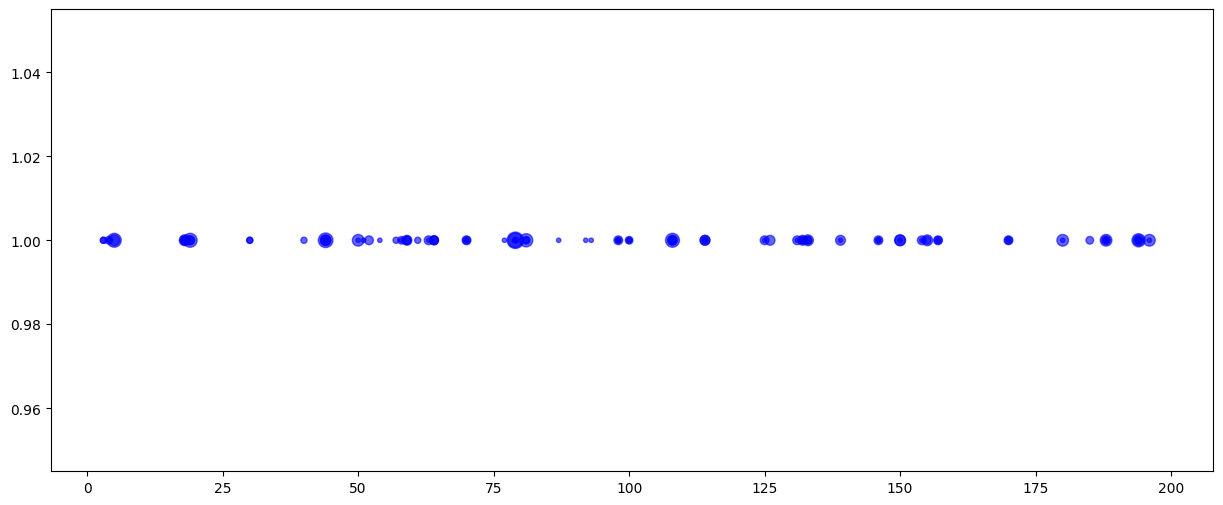

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

def generate_particle_positions(num_positions, max_position, max_particles_per_position, p):
    """
    Gera posições aleatórias de partículas sobre inteiros positivos dentro de um intervalo,
    com um número aleatório de partículas em cada posição.

    Args:
    num_positions (int): Número de posições.
    max_position (int): Máxima posição possível para uma partícula.
    max_particles_per_position (int): Máximo número de partículas por posição.
    p (float): Parâmetro da distribuição geométrica.

    Returns:
    list: Lista de posições das partículas e seus respectivos raios de ação.
    """
    positions = np.random.choice(range(max_position), num_positions, replace=False)
    particle_list = []
    for pos in positions:
        num_particles = np.random.randint(1, max_particles_per_position + 1)
        radii = np.random.geometric(p, num_particles) - 1
        for radius in radii:
            particle_list.append((pos, radius))
    return sorted(particle_list, key=lambda x: x[0])

def firework_process(particle_list, max_position):
    """
    Simula o processo de fogos de artifício com uma lista de partículas geradas usando uma fila.

    Args:
    particle_list (list): Lista de partículas com suas posições e raios de ação.
    max_position (int): Máxima posição possível para uma partícula.

    Returns:
    int: Número de partículas percorridas até o fim do experimento.
    list: Lista de conexões entre as partículas.
    list: Lista de índices das partículas visitadas.
    """
    n = len(particle_list)
    total_particles_visited = 0
    queue = deque([0])  # Inicializa a fila com a primeira partícula
    visited_positions = set()
    visited_positions.add(particle_list[0][0])
    connections = []
    visited_indices = []

    while queue:
        index = queue.popleft()

        if index >= n:
            continue

        position, radius = particle_list[index]

        # Conta a partícula atual como visitada
        total_particles_visited += 1
        visited_indices.append(index)

        if radius == 0:
            # Verifica todas as partículas anteriores para ver se alguma pode continuar além do índice atual
            can_continue = False
            for i in range(index):
                prev_position, prev_radius = particle_list[i]
                if prev_position + prev_radius > position:
                    can_continue = True
                    connections.append((prev_position, position))
                    break
            if not can_continue:
                break
        else:
            for i in range(1, radius + 1):
                next_position = position + i
                if next_position < max_position and next_position not in visited_positions:
                    for j in range(index + 1, n):
                        if particle_list[j][0] == next_position:
                            queue.append(j)
                            visited_positions.add(next_position)
                            connections.append((position, next_position))
                            break

    return total_particles_visited, connections, visited_indices

def run_experiments(num_positions, p, max_position, max_particles_per_position, N):
    """
    Executa o experimento N vezes e calcula a média de partículas visitadas.

    Args:
    num_positions (int): Número de posições.
    p (float): Parâmetro da distribuição geométrica.
    max_position (int): Máxima posição possível para uma partícula.
    max_particles_per_position (int): Máximo número de partículas por posição.
    N (int): Número de vezes que o experimento será repetido.

    Returns:
    float: Média de partículas visitadas.
    """
    total_particles = []
    all_connections = []
    all_visited_indices = []

    for _ in range(N):
        particle_list = generate_particle_positions(num_positions, max_position, max_particles_per_position, p)
        particles_visited, connections, visited_indices = firework_process(particle_list, max_position)
        total_particles.append(particles_visited)
        all_connections.append(connections)
        all_visited_indices.append(visited_indices)

    return np.mean(total_particles), total_particles, particle_list, all_connections, all_visited_indices

# Parâmetros da distribuição geométrica e do experimento
num_positions = 50  # Número de posições
p = 0.3  # Parâmetro da distribuição geométrica
max_position = 200  # Máxima posição possível para uma partícula
max_particles_per_position = 5  # Máximo número de partículas por posição
N = 1000  # Número de vezes que o experimento será repetido

# Executa os experimentos e calcula a média de partículas visitadas
mean_particles_visited, all_particles_visited, last_particle_list, all_connections, all_visited_indices = run_experiments(num_positions, p, max_position, max_particles_per_position, N)
print(f"A Média de partículas percorridas em {N} experimentos foi: {mean_particles_visited}")

# Extraindo posições e raios da última lista de partículas gerada
positions, radii = zip(*last_particle_list)
connections = all_connections[-1]
visited_indices = all_visited_indices[-1]

# Plotando as posições das partículas
plt.figure(figsize=(15, 6))

# Desenhando as conexões entre as partículas
for connection in connections:
    plt.plot(connection, [1, 1], 'ro-', alpha=0.3)

# Desenhando as partículas
colors = ['red' if i in visited_indices else 'blue' for i in range(len(positions))]
sizes = [r*10 for r in radii]

plt.scatter(positions, [1]*len(positions), s=sizes, c=colors, alpha=0.6)



### Próximos passos
1. Paralelização dos Experimentos: para aumentar a eficiência, especialmente ao executar um grande número de experimentos, podemos paralelizar a execução dos experimentos usando bibliotecas como multiprocessing ou joblib.

2. Análise Estatística Avançada: além da média, podemos calcular outras estatísticas descritivas, como a mediana, o desvio padrão e percentis das partículas visitadas. Isso forneceria uma visão mais completa dos resultados.

3. Visualização Interativa:usar bibliotecas de visualização interativa como plotly ou bokeh para criar gráficos interativos onde o usuário pode explorar as conexões e ver detalhes específicos sobre cada partícula.

4. Interface de Usuário (GUI): criar uma interface de usuário simples usando bibliotecas como tkinter ou PyQt para permitir que os usuários ajustem os parâmetros do experimento e visualizem os resultados facilmente.

5. Diferentes Distribuições de Raios: explorar diferentes distribuições para os raios de ação das partículas (por exemplo, distribuição exponencial, normal) e comparar os resultados com a distribuição geométrica.

6. Animação do Processo: criar uma animação que mostra o processo de propagação das partículas ao longo do tempo. Isso pode ser feito usando bibliotecas como matplotlib.animation ou manim.

*1. Paralelização dos Experimentos*

In [119]:
from joblib import Parallel, delayed
import numpy as np

def run_single_experiment(num_positions, p, max_position, max_particles_per_position):
    particle_list = generate_particle_positions(num_positions, max_position, max_particles_per_position, p)
    particles_visited, connections, visited_indices = firework_process(particle_list, max_position)
    return particles_visited

def run_experiments_parallel(num_positions, p, max_position, max_particles_per_position, N, n_jobs=-1):
    results = Parallel(n_jobs=n_jobs)(delayed(run_single_experiment)(num_positions, p, max_position, max_particles_per_position) for _ in range(N))
    return np.mean(results), results

# Executa os experimentos em paralelo e calcula a média de partículas visitadas
mean_particles_visited_parallel, all_particles_visited_parallel = run_experiments_parallel(num_positions, p, max_position, max_particles_per_position, N)
mean_particles_visited_parallel


1.831

*5. Diferentes Distribuições*

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

def generate_particle_positions(num_positions, max_position, max_particles_per_position, distribution, **kwargs):
    """
    Gera posições aleatórias de partículas sobre inteiros positivos dentro de um intervalo,
    com um número aleatório de partículas em cada posição.

    Args:
    num_positions (int): Número de posições.
    max_position (int): Máxima posição possível para uma partícula.
    max_particles_per_position (int): Máximo número de partículas por posição.
    distribution (str): Tipo de distribuição para os raios de ação ('geometric', 'exponential', 'normal').
    kwargs: Parâmetros específicos da distribuição.

    Returns:
    list: Lista de posições das partículas e seus respectivos raios de ação.
    """
    positions = np.random.choice(range(max_position), num_positions, replace=False)
    particle_list = []

    for pos in positions:
        num_particles = np.random.randint(1, max_particles_per_position + 1)

        if distribution == 'geometric':
            p = kwargs.get('p', 0.3)
            radii = np.random.geometric(p, num_particles) - 1
        elif distribution == 'exponential':
            scale = kwargs.get('scale', 1.0)
            radii = np.random.exponential(scale, num_particles).astype(int)
        elif distribution == 'normal':
            mean = kwargs.get('mean', 1)
            std = kwargs.get('std', 1)
            radii = np.random.normal(mean, std, num_particles).astype(int)
            radii = np.maximum(0, radii)  # Garantir que os raios não sejam negativos

        for radius in radii:
            particle_list.append((pos, radius))

    return sorted(particle_list, key=lambda x: x[0])

def firework_process(particle_list, max_position):
    """
    Simula o processo de fogos de artifício com uma lista de partículas geradas usando uma fila.

    Args:
    particle_list (list): Lista de partículas com suas posições e raios de ação.
    max_position (int): Máxima posição possível para uma partícula.

    Returns:
    int: Número de partículas percorridas até o fim do experimento.
    list: Lista de conexões entre as partículas.
    list: Lista de índices das partículas visitadas.
    """
    n = len(particle_list)
    total_particles_visited = 0
    queue = deque([0])  # Inicializa a fila com a primeira partícula
    visited_positions = set()
    visited_positions.add(particle_list[0][0])
    connections = []
    visited_indices = []

    while queue:
        index = queue.popleft()

        if index >= n:
            continue

        position, radius = particle_list[index]

        # Conta a partícula atual como visitada
        total_particles_visited += 1
        visited_indices.append(index)

        if radius == 0:
            # Verifica todas as partículas anteriores para ver se alguma pode continuar além do índice atual
            can_continue = False
            for i in range(index):
                prev_position, prev_radius = particle_list[i]
                if prev_position + prev_radius > position:
                    can_continue = True
                    connections.append((prev_position, position))
                    break
            if not can_continue:
                break
        else:
            for i in range(1, radius + 1):
                next_position = position + i
                if next_position < max_position and next_position not in visited_positions:
                    for j in range(index + 1, n):
                        if particle_list[j][0] == next_position:
                            queue.append(j)
                            visited_positions.add(next_position)
                            connections.append((position, next_position))
                            break

    return total_particles_visited, connections, visited_indices

def run_experiments(num_positions, max_position, max_particles_per_position, N, distribution, **kwargs):
    """
    Executa o experimento N vezes e calcula a média de partículas visitadas.

    Args:
    num_positions (int): Número de posições.
    max_position (int): Máxima posição possível para uma partícula.
    max_particles_per_position (int): Máximo número de partículas por posição.
    N (int): Número de vezes que o experimento será repetido.
    distribution (str): Tipo de distribuição para os raios de ação ('geometric', 'exponential', 'normal').
    kwargs: Parâmetros específicos da distribuição.

    Returns:
    float: Média de partículas visitadas.
    """
    total_particles = []
    all_connections = []
    all_visited_indices = []

    for _ in range(N):
        particle_list = generate_particle_positions(num_positions, max_position, max_particles_per_position, distribution, **kwargs)
        particles_visited, connections, visited_indices = firework_process(particle_list, max_position)
        total_particles.append(particles_visited)
        all_connections.append(connections)
        all_visited_indices.append(visited_indices)

    return np.mean(total_particles), total_particles, particle_list, all_connections, all_visited_indices

# Parâmetros do experimento
num_positions = 50  # Número de posições
max_position = 200  # Máxima posição possível para uma partícula
max_particles_per_position = 5  # Máximo número de partículas por posição
N = 1000  # Número de vezes que o experimento será repetido

# Comparação das diferentes distribuições
distributions = {
    'geometric': {'p': 0.3},
    'exponential': {'scale': 1.0},
    'normal': {'mean': 1, 'std': 1}
}

results = {}

for dist, params in distributions.items():
    mean_particles_visited, all_particles_visited, last_particle_list, all_connections, all_visited_indices = run_experiments(
        num_positions, max_position, max_particles_per_position, N, dist, **params)
    results[dist] = mean_particles_visited

# Resultados
for dist, mean_particles in results.items():
    print(f'Média de partículas visitadas para a distribuição {dist}: {mean_particles}')


Média de partículas visitadas para a distribuição geometric: 1.78
Média de partículas visitadas para a distribuição exponential: 1.151
Média de partículas visitadas para a distribuição normal: 1.207
